In [7]:
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt

# read recorded signal
f_data = open('data.txt', 'r')
data = f_data.read().split()
data = np.array(list(map(float, data)),)
f_data.close()

# read true signal
f_ref = open('reference_signal.txt', 'r')
ref = f_ref.read().split()
ref = np.array(list(map(float, ref)))
f_ref.close()


In [8]:
def perturb_observations(data,r,R):
    # R covariance matrix
    # r number of ensemble members
    numData = len(data)
    y = np.tile(data,(r,1))
    y = y + np.random.normal(0,R,(r,numData))
    return y

def MSE(y1,y2):
    ar1 = np.array(y1)
    ar2 = np.array(y2)
    return np.mean((ar1-ar2)**2)


0.13326239656853384


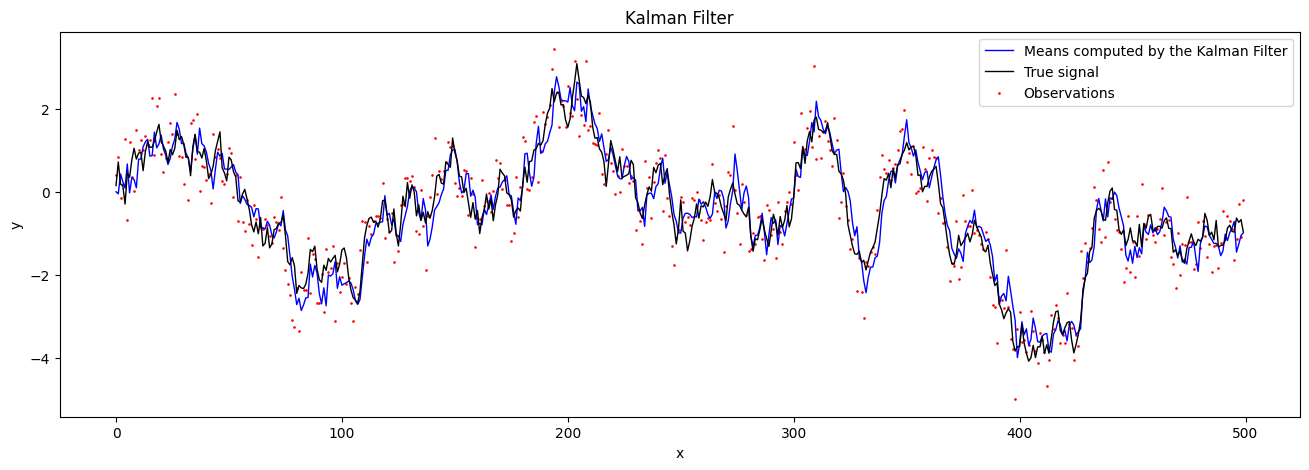

In [9]:
r = 10
R = 0.5
Q = 0.5
H = 1
n = len(data)
y = perturb_observations(data,r,R)
listMean = [0,]
listVar = [0.5,]

# Initialise ensemble
xA = np.random.normal(0,0.5,(r,1))

for i in range(n):

    # Forecast
    xF = 0.99*xA + np.random.normal(0,Q,(r,1))
    empMean = np.mean(xF)
    empVar = np.var(xF)

    # Kalman Gain
    K = empVar*H/(R+H**2*empVar)

    # Analysis
    xA = xF - K*(xF-y[:,i])   

    # store empirical mean and covariance
    listMean.append(np.mean(xA))
    listVar.append(np.var(xA))

print(MSE(listMean,ref))


plt.figure(figsize=(16,5))
plt.plot(listMean[:500],'b-',lw=1)
plt.plot(ref[:500],'k-',lw=1)
plt.scatter(list(range(len(data[:500]))), data[:500], s=0.8, c='red')
plt.title('Kalman Filter')
plt.legend(['Means computed by the Kalman Filter','True signal', 'Observations'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

